In [45]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [46]:
folder = './data'

file1 = '/s41598-020-73558-3_sepsis_survival_primary_cohort'

df_primary = pd.read_csv(folder + file1 + '.csv')

In [47]:
df_primary.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


In [48]:
print("\nInformações sobre o conjunto de dados:")
df_primary.info()


Informações sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110204 entries, 0 to 110203
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      110204 non-null  int64
 1   sex_0male_1female              110204 non-null  int64
 2   episode_number                 110204 non-null  int64
 3   hospital_outcome_1alive_0dead  110204 non-null  int64
dtypes: int64(4)
memory usage: 3.4 MB


In [49]:
print("\nEstatísticas descritivas do conjunto de dados primary")
print(df_primary.describe())


Estatísticas descritivas do conjunto de dados primary
           age_years  sex_0male_1female  episode_number  \
count  110204.000000      110204.000000   110204.000000   
mean       62.735255           0.473948        1.349379   
std        24.126806           0.499323        0.751799   
min         0.000000           0.000000        1.000000   
25%        51.000000           0.000000        1.000000   
50%        68.000000           0.000000        1.000000   
75%        81.000000           1.000000        1.000000   
max       100.000000           1.000000        5.000000   

       hospital_outcome_1alive_0dead  
count                  110204.000000  
mean                        0.926455  
std                         0.261031  
min                         0.000000  
25%                         1.000000  
50%                         1.000000  
75%                         1.000000  
max                         1.000000  


#### Análise sobre o descritivo: 

- A média dos pacientes é de aproximadamente 62 anos
- O desvio padrão da idade é 24,12 o que indica que a idade dos pacientes varia consideravelmente.
- A idade mínima é de 0 anos e a idade máxima é de 100 anos.
- O quartil de 25% (Q1) indica que 25% dos dados são menores que esse valor, o quartil de 50% (Q2) é a mediana, e o quartil de 75% (Q3) indica que 75% dos dados são menores que esse valor.


In [50]:
print("\nValores ausentes no conjunto de dados:")
print(df_primary.isnull().sum())


Valores ausentes no conjunto de dados:
age_years                        0
sex_0male_1female                0
episode_number                   0
hospital_outcome_1alive_0dead    0
dtype: int64


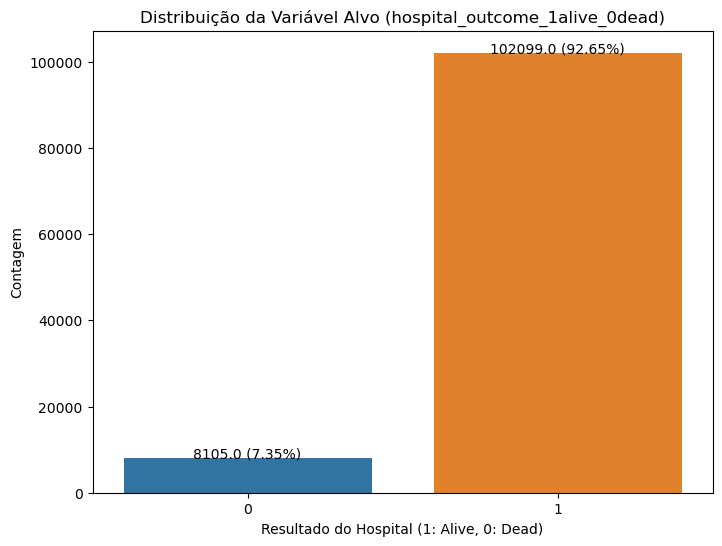

In [51]:
### Primary

# Visualizar a distribuição da variável alvo 'hospital_outcome_1alive_0dead'
plt.figure(figsize=(8, 6))
sns.countplot(x='hospital_outcome_1alive_0dead', data=df_primary)
plt.title('Distribuição da Variável Alvo (hospital_outcome_1alive_0dead)')
plt.xlabel('Resultado do Hospital (1: Alive, 0: Dead)')
plt.ylabel('Contagem')

total = float(len(df_primary))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height} ({height / total * 100:.2f}%)',
            ha="center")

plt.show()

#### Insights sobre o gráfico:
- É possível ver que 7,35% dos casos tiveram óbitos enquanto 92,65% dos casos não tiveram óbito, resultando em sobrevivência.
    
   

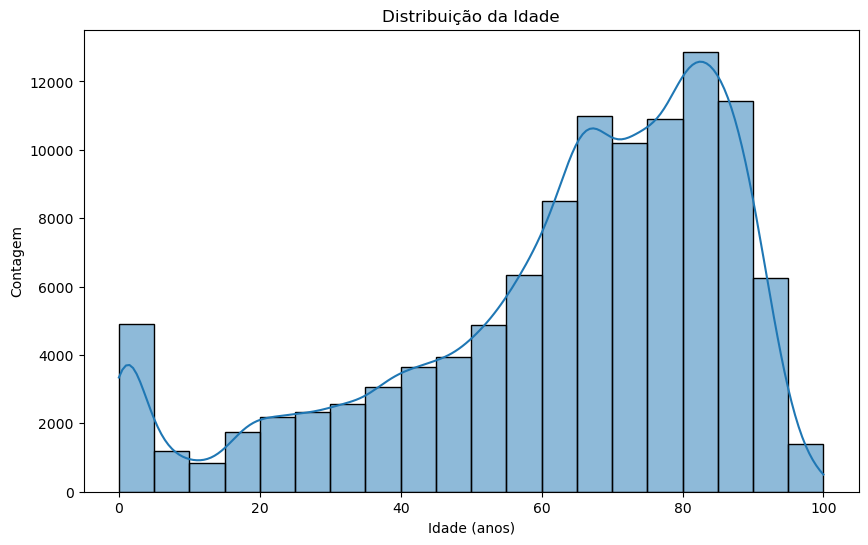

In [52]:
# Visualizar a distribuição da idade (age_years)
plt.figure(figsize=(10, 6))
sns.histplot(x='age_years', data=df_primary, bins=20, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade (anos)')
plt.ylabel('Contagem')
plt.show()

##### Comentários sobre o gráfico:
- É possível ver que há uma concentração de casos na faixa etária 80-85 anos. O que é de se esperar já que vários estudos comprovam a relação do risco de sepse com idades elevadas.
- É possível notar que há um grande número de casos em pacientes bebês, entre 0 e 5 anos, o que confirma outros estudos científicos a respeito da probabilidade de sepse em recém nascidos.
- É possível ver que quanto mais a idade avança, maior o número de casos, sem exceção. A única observação é que aos 90 anos, o número de casos tem um decrescimento.

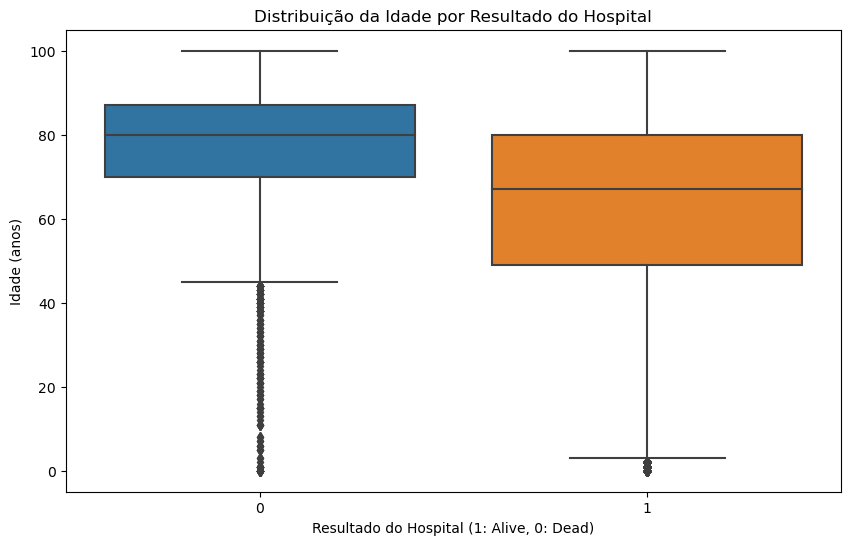

In [53]:
# Visualizar a distribuição da idade por resultado do hospital
plt.figure(figsize=(10, 6))
sns.boxplot(x='hospital_outcome_1alive_0dead', y='age_years', data=df_primary)
plt.title('Distribuição da Idade por Resultado do Hospital')
plt.xlabel('Resultado do Hospital (1: Alive, 0: Dead)')
plt.ylabel('Idade (anos)')
plt.show()

##### Insights sobre o gráfico:

- O gráfico apresenta uma distribuição assimétrica para ambas as classes (vivos e mortos).
- A maioria dos pacientes está concentrada nas faixas etárias mais baixas (entre 0 e 40 anos).
- A probabilidade de morte aumenta com a idade em ambas as classes.
- A diferença na probabilidade de morte entre as classes é mais significativa nas faixas etárias mais elevadas.
- Pacientes mais jovens têm maior chance de sobreviver ao tratamento hospitalar.
- Pacientes mais velhos apresentam maior risco de morte.
- A idade é um fator de risco importante para o resultado do tratamento hospitalar.

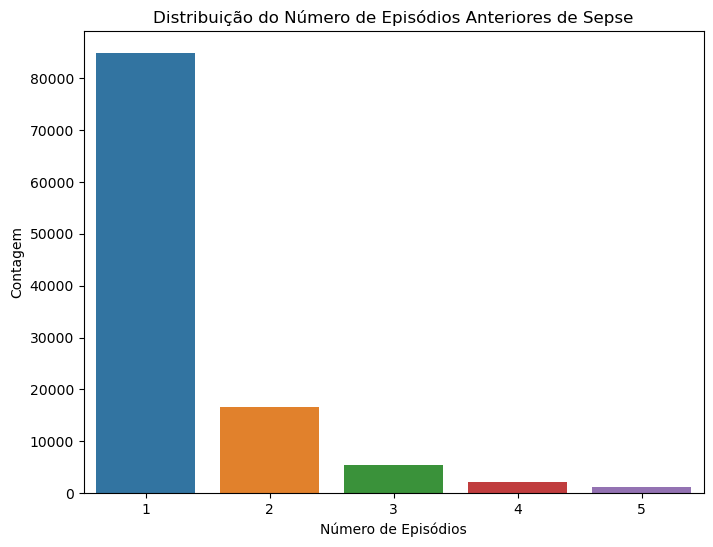

In [54]:
# Visualizar a distribuição da quantidade de episódios anteriores de sepse (episode_number)
plt.figure(figsize=(8, 6))
sns.countplot(x='episode_number', data=df_primary)
plt.title('Distribuição do Número de Episódios Anteriores de Sepse')
plt.xlabel('Número de Episódios')
plt.ylabel('Contagem')
plt.show()

##### Insights sobre o gráfico:

- O número de pacientes diminui com o aumento do número de episódios anteriores de sepse.
- A distribuição é assimétrica à direita, com uma cauda longa para valores mais altos de episódios anteriores de sepse.

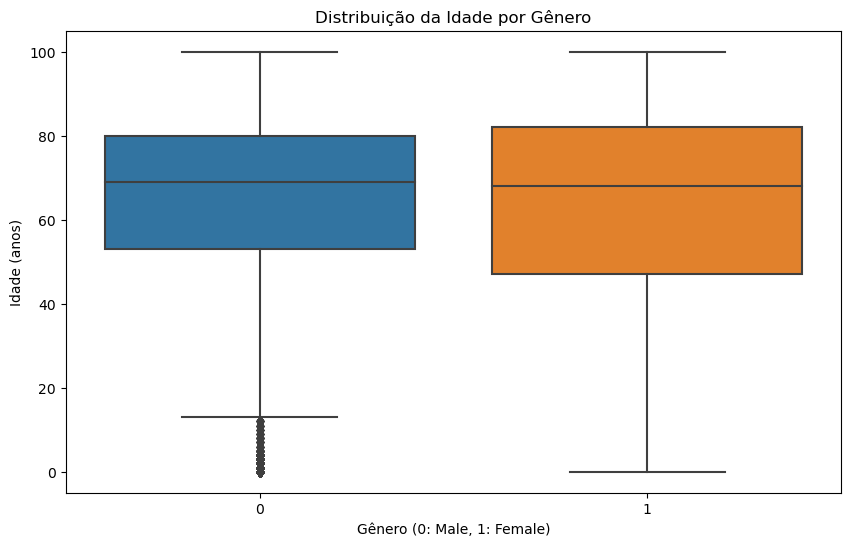

In [55]:
# Distribuição da idade por resultado do hospital usando
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex_0male_1female', y='age_years', data=df_primary)
plt.title('Distribuição da Idade por Gênero')
plt.xlabel('Gênero (0: Male, 1: Female)')
plt.ylabel('Idade (anos)')
plt.show()

##### Insights sobre o gráfico:

- A maioria dos pacientes está concentrada nas faixas etárias mais baixas (entre 0 e 40 anos).
- Há um ligeiro aumento no número de pacientes do sexo feminino nas faixas etárias mais elevadas.
- A distribuição da idade não parece ser significativamente diferente entre os gêneros.

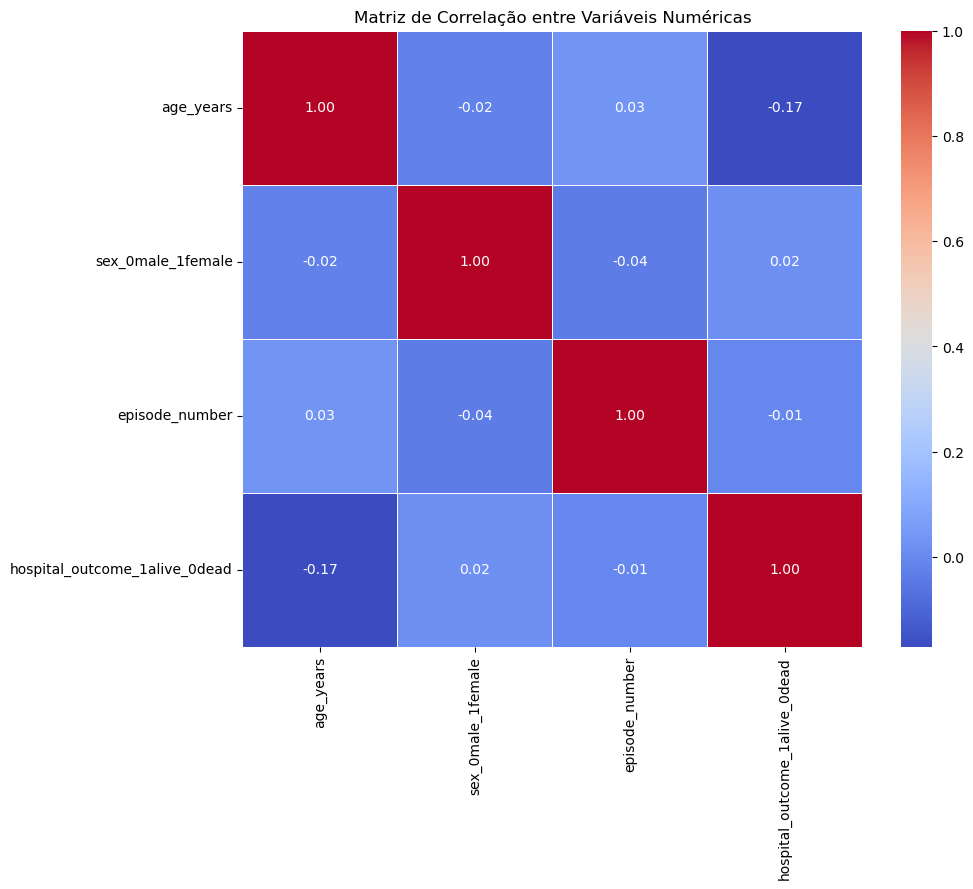

In [56]:
# Análises estatísticas

# Matriz de correlação entre variáveis numéricas

correlation_matrix = df_primary.corr()

# Criar o gráfico de mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

##### Insights sobre a matiz de correlação:

- Há uma fraca correlação negativa (-0,17) entre idade e óbito/não óbito. Isso significa que pessoas mais velhas são ligeiramente menos propensas a sobreviver do que pessoas mais jovens.
- Há uma correlação positiva muito fraca (0,03) entre idade e número de episódios de sepse. Isso significa que quase não há relação entre a idade e quantas vezes uma pessoa foi hospitalizada.
- Há uma correlação negativa muito fraca (-0,02) entre sexo e idade. Isso significa que quase não há relação entre sexo e idade.
- Há uma fraca correlação negativa (-0,04) entre sexo e número de episódios. Isso significa que as mulheres são ligeiramente menos propensas a ter sido hospitalizadas várias vezes do que os homens.
- Há uma correlação positiva muito fraca (0,02) entre sexo e saída hospitalar (óbito/não óbito). Isso significa que quase não há relação entre sexo e se uma pessoa sobrevive à hospitalização.
- Há uma correlação negativa muito fraca (-0,01) entre número de episódios e resultado.

### Modelo de Regressão Logística

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Divisão dos dados em conjunto de treinamento e teste (usando apenas a variável 'age_years')
X = df_primary[['age_years']]
y = df_primary['hospital_outcome_1alive_0dead']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Usando modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.93

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1613
           1       0.93      1.00      0.96     20428

    accuracy                           0.93     22041
   macro avg       0.46      0.50      0.48     22041
weighted avg       0.86      0.93      0.89     22041



##### Precisão:
 - A classe 0 (mortos) tem precisão de 0.00, o que significa que o modelo não conseguiu classificar corretamente nenhuma observação positiva dessa classe. 
 - Para a classe 1 (vivos), a precisão é de 0.93, o que indica que 93% das observações classificadas como vivas pelo modelo foram realmente vivas.

##### Recall:
- É a proporção de observações positivas que foram corretamente identificadas pelo modelo em relação a todas as observações que realmente pertencem à classe positiva. 
- Para a classe 0, a revocação é 0.00, o que significa que o modelo não conseguiu identificar corretamente nenhuma observação positiva dessa classe. 
- Para a classe 1, a revocação é 1.00, indicando que todas as observações realmente vivas foram corretamente identificadas pelo modelo.

##### F1-Score:
- O score fornece uma medida única que leva em consideração tanto falsos positivos quanto falsos negativos. 
- Para a classe 0, o F1-score é 0.00.
- Para a classe 1, o F1-score é 0.96.

##### Suporte (support):
- O suporte é o número de ocorrências reais de cada classe no conjunto de teste. 
- Para a classe 0, o suporte é 1613 e para a classe 1, o suporte é 20428.

##### Acurácia (accuracy):
- A acurácia é a proporção de observações classificadas corretamente pelo modelo em relação ao total de observações. 
- Neste caso, a acurácia é 0.93, o que significa que o modelo classificou corretamente 93% das observações no conjunto de teste.

##### Média ponderada (weighted avg):
- A média ponderada das métricas de precisão, recall e F1-score, levando em consideração o suporte de cada classe. A precisão ponderada é 0.86, a revocação ponderada é 0.93 e o F1-score ponderado é 0.89.

### Considerações sobre o modelo:
- o modelo teve um desempenho muito bom na previsão da classe 1 (vivos), mas não conseguiu prever corretamente nenhuma observação da classe 0 (mortos). Isso pode ser devido ao desbalanceamento de classes no conjunto de dados, onde a classe 1 tem muito mais ocorrências do que a classe 0.

### Modelo Árvore de decisão

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Divisão dos dados em conjunto de treinamento e teste (usando apenas a variável 'age_years')
X = df_primary[['age_years']]
y = df_primary['hospital_outcome_1alive_0dead']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escolha do algoritmo de machine learning (Árvore de Decisão) e treinamento do modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.93

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1613
           1       0.93      1.00      0.96     20428

    accuracy                           0.93     22041
   macro avg       0.46      0.50      0.48     22041
weighted avg       0.86      0.93      0.89     22041



### Considerações sobre o modelo:

- Como os dois modelos anteriores apresentaram os mesmos resultados podemos inferir que isso pode indicar que a relação entre a idade e o resultado hospitalar (óbito/não óbito) é relativamente simples e linear!
- Outros modelos têm grande chance de apresentar os mesmos resultados, portanto não apresentarei outras implementações